In [ ]:
#python ≥3.5 is required
import sys
assert sys.version_info >= (3,5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import seaborn as sns
from scipy import stats
import missingno as msno

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import style
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/jpzambranoleon/ML_Projects/master/" 
TRAIN_PATH = os.path.join("datasets", "bike_train")
TRAIN_URL = DOWNLOAD_ROOT + "datasets/bike_train.csv"

def fetch_train_data(train_url=TRAIN_URL, train_path=TRAIN_PATH):
  os.makedirs(train_path, exist_ok=True)
  csv_path = os.path.join(train_path, "bike_train.csv")
  urllib.request.urlretrieve(train_url, csv_path)


TEST_PATH = os.path.join("datasets", "bike_test")
TEST_URL = DOWNLOAD_ROOT + "datasets/bike_test.csv"

def fetch_test_data(test_url=TEST_URL, test_path=TEST_PATH):
  os.makedirs(test_path, exist_ok=True)
  csv_path = os.path.join(test_path, 'bike_test.csv')
  urllib.request.urlretrieve(test_url, csv_path)

In [ ]:
fetch_train_data()
fetch_test_data()

In [ ]:
import pandas as pd

def load_train_data(train_path=TRAIN_PATH):
  csv_path = os.path.join(train_path, "bike_train.csv")
  return pd.read_csv(csv_path)


def load_test_data(test_path=TEST_PATH):
  csv_path = os.path.join(test_path, 'bike_test.csv')
  return pd.read_csv(csv_path)

In [ ]:
bicycle_data = load_train_data()
bicycle_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test_data = load_test_data()
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
bicycle_data.shape 

(10886, 12)

In [ ]:
bicycle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
bicycle_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
bicycle_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


Saving figure attribute_histogram_plots


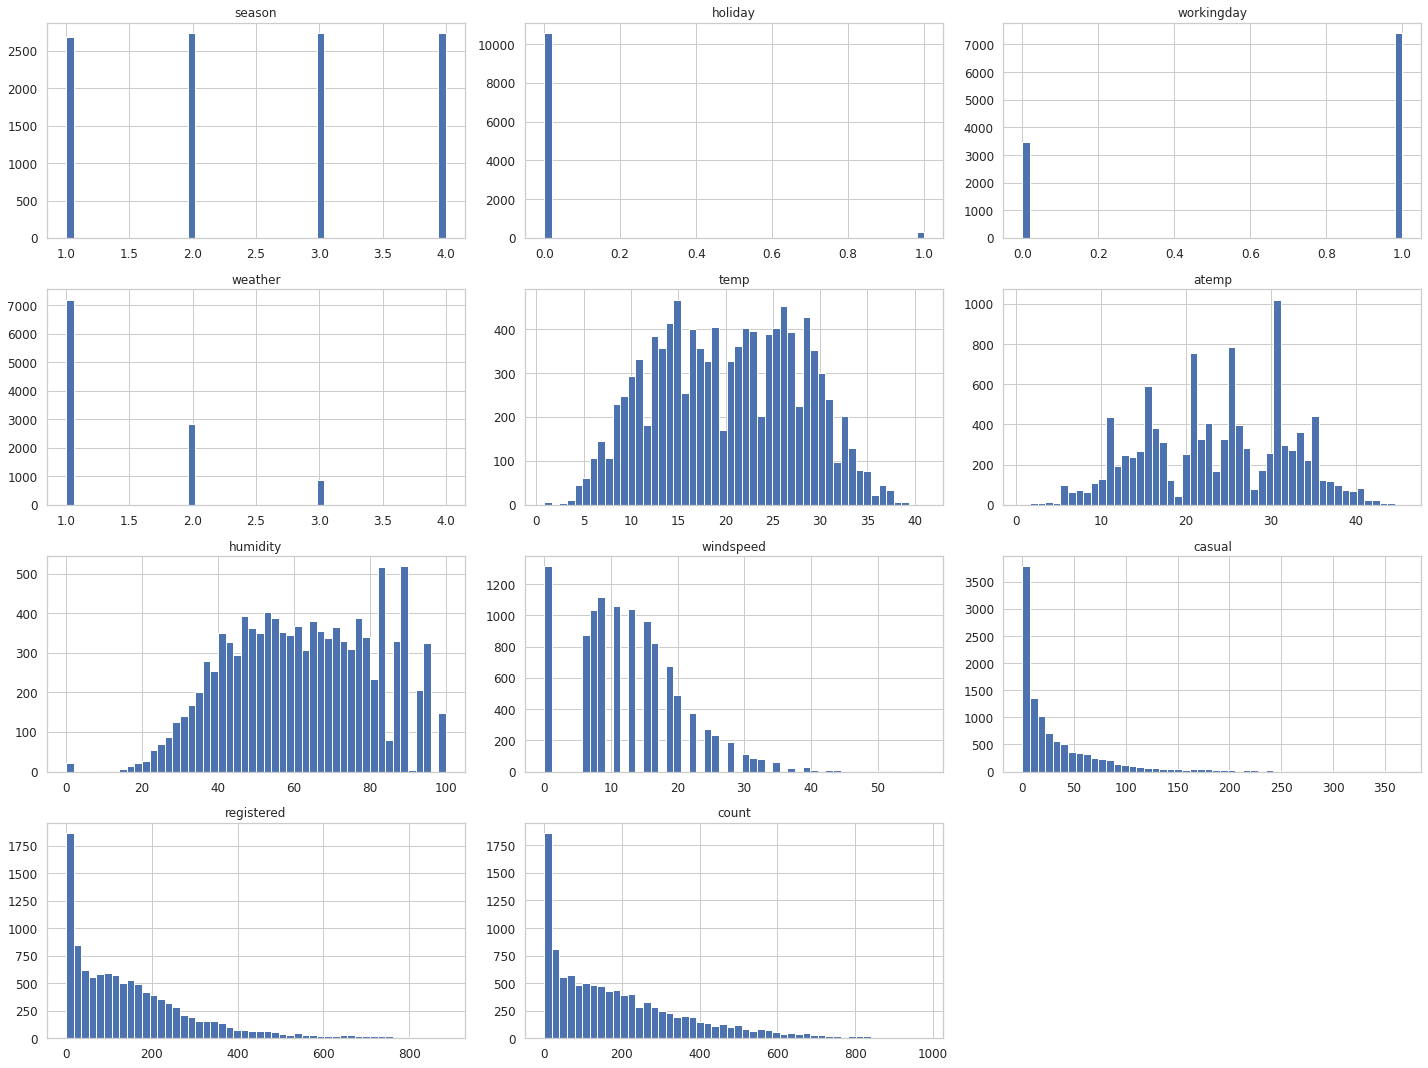

In [ ]:
bicycle_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [ ]:
#transfer the target from x to log(x+1)
for col in ['casual', 'registered', 'count']:
  bicycle_data['%s_log' % col] = np.log(bicycle_data[col] + 1)

In [ ]:
bicycle_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,casual_log,registered_log,count_log
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1.386294,2.639057,2.833213
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2.197225,3.496508,3.713572
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1.791759,3.332205,3.496508
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1.386294,2.397895,2.639057
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0.000000,0.693147,0.693147


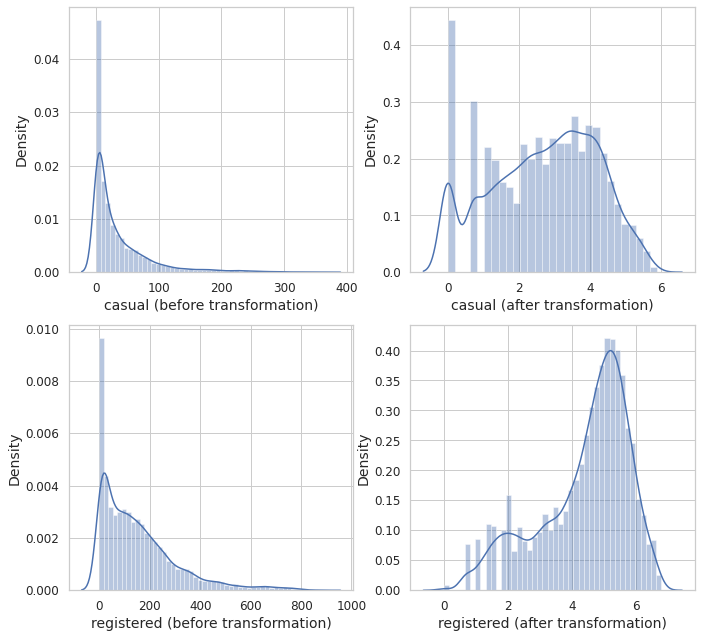

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.distplot(bicycle_data['casual'])
plt.xlabel("casual (before transformation)")
plt.subplot(222)
sns.distplot(np.log(bicycle_data['casual'] + 1))
plt.xlabel("casual (after transformation)")
plt.subplot(223)
sns.distplot(bicycle_data['registered'])
plt.xlabel("registered (before transformation)")
plt.subplot(224)
sns.distplot(np.log(bicycle_data['registered'] + 1))
plt.xlabel("registered (after transformation)")
plt.show()

In [ ]:
def featureEngineering(data):
  season = pd.get_dummies(data['season'], prefix = 'season')
  data = pd.concat([data, season], axis = 1)

  weather = pd.get_dummies(data['weather'], prefix = 'weather')
  data = pd.concat([data, weather], axis = 1)

  data["hour"] = [t.hour for t in pd.DatetimeIndex(data.datetime)]
  data["day"] = [t.dayofweek for t in pd.DatetimeIndex(data.datetime)]
  data["month"] = [t.month for t in pd.DatetimeIndex(data.datetime)]
  data["year"] = [t.year for t in pd.DatetimeIndex(data.datetime)]

  data['year_season'] = data.year + data.season / 10

  data['hour_workingday_casual'] = df[['hour', 'workingday']].apply(
        lambda x: int(10 <= x['hour'] <= 19), axis=1)
  data['hour_workingday_registered'] = df[['hour', 'workingday']].apply(
      lambda x: int((x['workingday'] == 1 and (x['hour'] == 8 or 17 <= x['hour'] <= 18))
      or (x['workingday'] == 0 and 10 <= x['hour'] <= 19)), axis=1)
  return data

In [ ]:
train = featureEngineering(bicycle_data)

In [ ]:
by_season = train.groupby('year_season')[['count']].median()
by_season.columns = ['count_season']

train = train.join(by_season, on='year_season')

train.drop(['datetime', 'season', 'weather'], axis = 1, inplace = True)

In [ ]:
train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,casual_log,registered_log,count_log,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year,year_season,hour_workingday_casual,hour_workingday_registered,count_season
0,0,0,9.84,14.395,81,0.0,3,13,16,1.386294,2.639057,2.833213,1,0,0,0,1,0,0,0,0,5,1,0,0.1,0,0,57
1,0,0,9.02,13.635,80,0.0,8,32,40,2.197225,3.496508,3.713572,1,0,0,0,1,0,0,0,1,5,1,0,0.1,0,0,57
2,0,0,9.02,13.635,80,0.0,5,27,32,1.791759,3.332205,3.496508,1,0,0,0,1,0,0,0,2,5,1,0,0.1,0,0,57
3,0,0,9.84,14.395,75,0.0,3,10,13,1.386294,2.397895,2.639057,1,0,0,0,1,0,0,0,3,5,1,0,0.1,0,0,57
4,0,0,9.84,14.395,75,0.0,0,1,1,0.000000,0.693147,0.693147,1,0,0,0,1,0,0,0,4,5,1,0,0.1,0,0,57


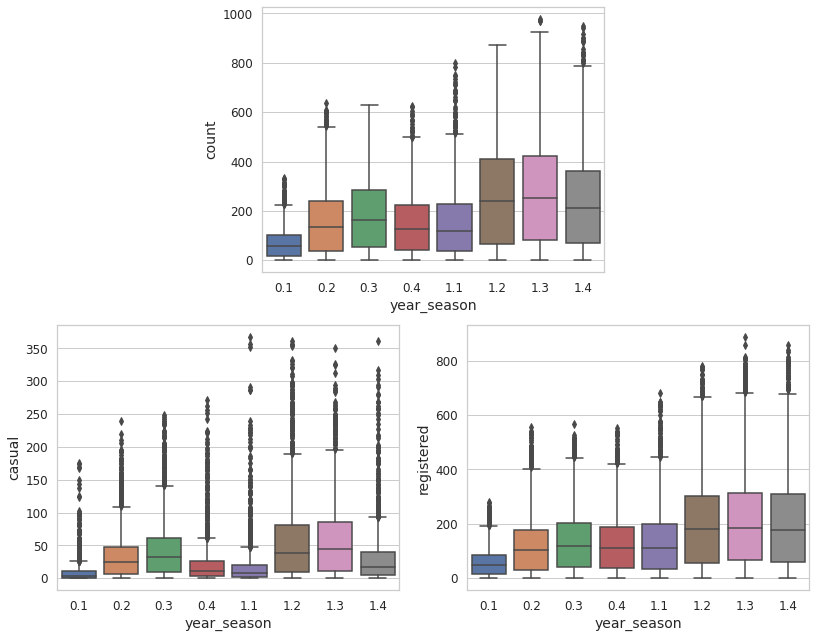

In [ ]:
fig = plt.figure(figsize=(12, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='year_season', y='count', data=train)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='year_season', y='casual', data=train)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='year_season', y='registered', data=train)
plt.show()

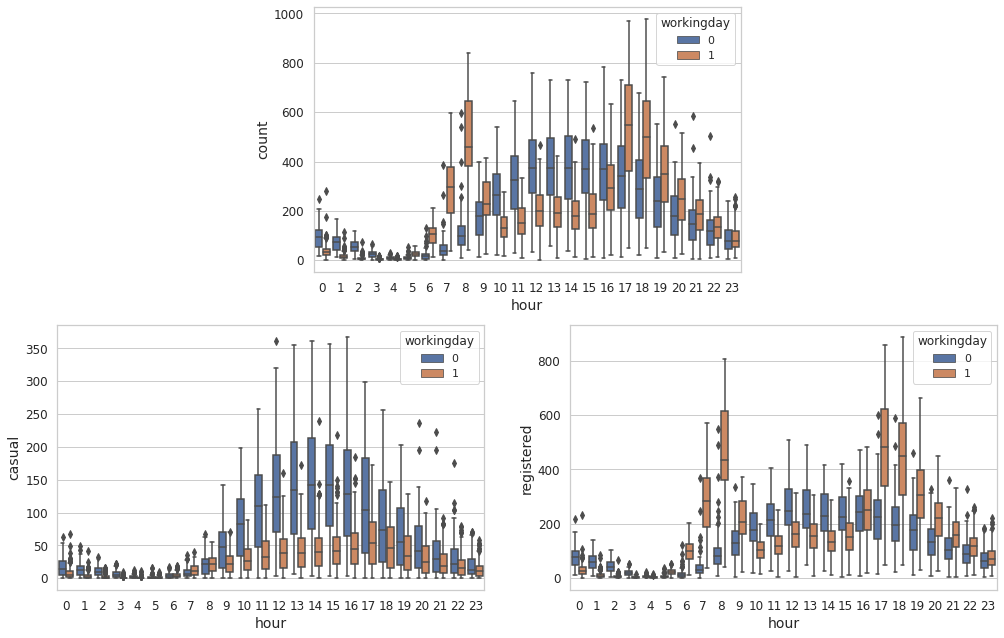

In [ ]:
# new feature
# non-registered user: more rentals during daytime
# registered user: more rentals when going to work / going off work
fig = plt.figure(figsize=(15, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='hour', y='count', hue='workingday', data=train)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='hour', y='casual', hue='workingday', data=train)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='hour', y='registered', hue='workingday', data=train)
plt.show()

In [ ]:
features_set1 = ['season_1', 'season_2', 'season_3', 'season_4', 'holiday', 'workingday', 
                 'weather_1', 'weather_2', 'weather_3', 'weather_4', 'temp', 'atemp', 
                 'humidity', 'windspeed', 'year', 'hour', 'day', 
                 'hour_workingday_casual', 'count_season']

features_set2 = ['season_1', 'season_2', 'season_3', 'season_4', 'holiday', 'workingday', 
                 'weather_1', 'weather_2', 'weather_3', 'weather_4', 'temp', 'atemp', 
                 'humidity', 'windspeed', 'year', 'hour', 'day', 
                 'hour_workingday_casual', 'count_season']

train_casual = train[features_set1]
train_registered = train[features_set2]                

In [ ]:
from sklearn.model_selection import train_test_split

CX_train, CX_test, cy_train, cy_test = train_test_split(train_casual, train['casual_log'], 
                                                        test_size=0.2, random_state=42)

In [ ]:
print("Length of training set:", len(CX_train))
print("Length of testing set:", len(CX_test))
print("Length of total set:", len(train_casual))

Length of training set: 8708
Length of testing set: 2178
Length of total set: 10886


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

C_forest_reg = RandomForestRegressor()
C_forest_reg.fit(CX_train, cy_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
C_train_predictions = C_forest_reg.predict(CX_train)
C_forest_mse = mean_squared_error(cy_train, C_train_predictions)
C_forest_rmse = np.sqrt(C_forest_mse)
C_forest_rmse

0.18357255667334724

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(C_forest_reg, CX_train, cy_train,
                         scoring='neg_mean_squared_error', cv=10)
C_forest_reg_rmse_score = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print("Scores", scores)
  print("Mean", scores.mean())
  print("Standard deviation", scores.std())

display_scores(C_forest_reg_rmse_score)

Scores [0.48068253 0.49101925 0.50314474 0.52429806 0.50184017 0.47981176
 0.47306284 0.51114474 0.471431   0.4903725 ]
Mean 0.4926807581761937
Standard deviation 0.016395227352663407


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [30, 100, 130, 200], 'max_features': [8, 12, 14, 16]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}          
]

C_forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(C_forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(CX_train, cy_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 200}

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

0.49276225921065847 {'max_features': 8, 'n_estimators': 30}
0.4877137101196113 {'max_features': 8, 'n_estimators': 100}
0.4866682829134973 {'max_features': 8, 'n_estimators': 130}
0.48592871911185975 {'max_features': 8, 'n_estimators': 200}
0.49492530563271847 {'max_features': 12, 'n_estimators': 30}
0.49022593431836853 {'max_features': 12, 'n_estimators': 100}
0.48748255007236724 {'max_features': 12, 'n_estimators': 130}
0.4871494227620758 {'max_features': 12, 'n_estimators': 200}
0.49417881814102155 {'max_features': 14, 'n_estimators': 30}
0.4898214904611356 {'max_features': 14, 'n_estimators': 100}
0.4891827275205255 {'max_features': 14, 'n_estimators': 130}
0.4888074907304563 {'max_features': 14, 'n_estimators': 200}
0.4989100890778544 {'max_features': 16, 'n_estimators': 30}
0.49261181402911935 {'max_features': 16, 'n_estimators': 100}
0.49197562345834545 {'max_features': 16, 'n_estimators': 130}
0.49099500520558514 {'max_features': 16, 'n_estimators': 200}
0.6706705787834588 {'bo

In [ ]:
C_final_model = grid_search.best_estimator_

C_final_predictions = C_final_model.predict(CX_test)
C_final_mse = mean_squared_error(cy_test, C_final_predictions)
C_final_rmse = np.sqrt(C_final_mse)
C_final_rmse

0.49668210321849793

In [ ]:
from scipy import stats
confidence = 0.95
squared_erros = (C_final_predictions - cy_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_erros) -1,
                         loc=squared_erros.mean(),
                         scale=stats.sem(squared_erros)))

array([0.47686195, 0.51574112])

In [ ]:
RX_train, RX_test, ry_train, ry_test = train_test_split(train_registered, train['registered_log'],
                                                        test_size=0.2, random_state=42)

In [ ]:
print("Lenth of training set:", len(RX_train))
print("Length of testing set:", len(RX_test))
print("Length of total set:", len(train_registered))

Lenth of training set: 8708
Length of testing set: 2178
Length of total set: 10886


In [ ]:
R_forest_reg = RandomForestRegressor()
R_forest_reg.fit(RX_train, ry_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
R_train_predictions = R_forest_reg.predict(RX_train)
R_forest_mse = mean_squared_error(ry_train, R_train_predictions)
R_forest_rmse = np.sqrt(R_forest_mse)
R_forest_rmse

0.11528322374536633

In [ ]:
scores = cross_val_score(R_forest_reg, RX_train, ry_train,
                         scoring='neg_mean_squared_error', cv=10)
R_forest_reg_rmse_score = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print("Scores", scores)
  print("Mean", scores.mean())
  print("Standard deviation", scores.std())

display_scores(R_forest_reg_rmse_score)

Scores [0.28160492 0.33438224 0.31354785 0.31477989 0.30638754 0.3195979
 0.30143449 0.32611166 0.28756049 0.32722168]
Mean 0.31126286537374215
Standard deviation 0.01630491163056052


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [30, 100, 130, 200], 'max_features': [8, 12, 14, 16]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}          
]

R_forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(R_forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(RX_train, ry_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid_search.best_params_

{'max_features': 12, 'n_estimators': 200}

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

0.31964325858557724 {'max_features': 8, 'n_estimators': 30}
0.31362564076936444 {'max_features': 8, 'n_estimators': 100}
0.31109410651367997 {'max_features': 8, 'n_estimators': 130}
0.3104561213763448 {'max_features': 8, 'n_estimators': 200}
0.30931590279266946 {'max_features': 12, 'n_estimators': 30}
0.30429899360655066 {'max_features': 12, 'n_estimators': 100}
0.3040021510621874 {'max_features': 12, 'n_estimators': 130}
0.3035563536541522 {'max_features': 12, 'n_estimators': 200}
0.3113380279921509 {'max_features': 14, 'n_estimators': 30}
0.3063789759035823 {'max_features': 14, 'n_estimators': 100}
0.30576078836500753 {'max_features': 14, 'n_estimators': 130}
0.3049552948690348 {'max_features': 14, 'n_estimators': 200}
0.31175256690545666 {'max_features': 16, 'n_estimators': 30}
0.3086219286739599 {'max_features': 16, 'n_estimators': 100}
0.3087956382804489 {'max_features': 16, 'n_estimators': 130}
0.3068464958153546 {'max_features': 16, 'n_estimators': 200}
0.6214616317325505 {'boot

In [ ]:
R_final_model = grid_search.best_estimator_

R_final_predictions = R_final_model.predict(RX_test)
R_final_mse = mean_squared_error(ry_test, R_final_predictions)
R_final_rmse = np.sqrt(R_final_mse)
R_final_rmse

0.3032307657606295

In [ ]:
confidence = 0.95
squared_erros = (R_final_predictions - ry_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_erros) -1,
                         loc=squared_erros.mean(),
                         scale=stats.sem(squared_erros)))

array([0.28278707, 0.32238062])

In [ ]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
datetimecol = test_data['datetime']

In [ ]:
test_data_modified = featureEngineering(test_data)
test_data_modified = test_data_modified.join(by_season, on='year_season')
test_data_modified.drop(['datetime', 'season', 'weather'], axis = 1, inplace = True)

In [ ]:
test_data_modified.head()

,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year,year_season,hour_workingday_casual,hour_workingday_registered,count_season
0,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,0,3,1,0,0.1,0,0,57
1,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,1,3,1,0,0.1,0,0,57
2,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2,3,1,0,0.1,0,0,57
3,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,3,3,1,0,0.1,0,0,57
4,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,4,3,1,0,0.1,0,0,57


In [ ]:
def submission(final_model1, final_model2, number):
  pred_casual = final_model1.predict(test_data_modified[features_set1])
  pred_casual = np.exp(pred_casual)-1
  pred_casual[pred_casual < 0] = 0
  pred_registered = final_model2.predict(test_data_modified[features_set2])
  pred_registered = np.exp(pred_registered)-1
  pred_registered[pred_registered < 0] = 0
  pred_count = pred_casual + pred_registered

  submit = pd.DataFrame({'datetime':datetimecol, 'count':pred_count},
                        columns = ['datetime', 'count'])
  submit.loc[submit['count']<0] = 0
  submit.to_csv('Jean-Paul' + str(number) + '.csv', index = False)

In [ ]:
submission(C_final_model, R_final_model, 5)

In [ ]:
df = pd.read_csv('Jean-Paul5.csv')
df.head()

,datetime,count
0,2011-01-20 00:00:00,11.672356
1,2011-01-20 01:00:00,5.331107
2,2011-01-20 02:00:00,2.351047
3,2011-01-20 03:00:00,2.189649
4,2011-01-20 04:00:00,1.975571
